# Compare diffrent model classafier 

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:

rf_data = {
    "Classifier": ["Additive model", "Experiment_label", "dep_label", "expression_label"],
    "AUC": [0.731237, 0.933312, 0.926698, 0.919312],
    "Accuracy": [0.883384, 0.889417, 0.947875, 0.956946],
    "Precision": [0.700000, 0.826415, 0.958333, 0.916667],
    "Recall": [0.202312, 0.651786, 0.422018, 0.473118],
    "F1-Score": [0.313901, 0.728785, 0.585987, 0.624113],
}


# Create DataFrame from corrected data
rf_df = pd.DataFrame(rf_data)

# Display the DataFrame
print(rf_df)

         Classifier       AUC  Accuracy  Precision    Recall  F1-Score
0    Additive model  0.731237  0.883384   0.700000  0.202312  0.313901
1  Experiment_label  0.933312  0.889417   0.826415  0.651786  0.728785
2         dep_label  0.926698  0.947875   0.958333  0.422018  0.585987
3  expression_label  0.919312  0.956946   0.916667  0.473118  0.624113


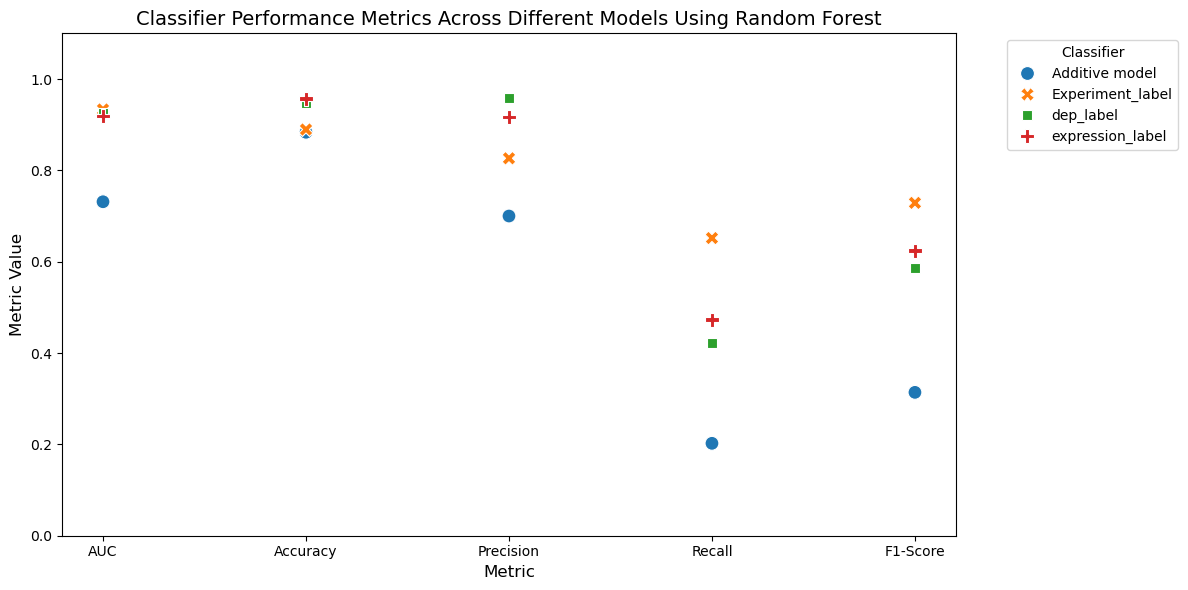

In [22]:
# Melt the DataFrame to prepare for visualization
melted_df = rf_df.melt(
    id_vars=['Classifier'],  
    value_vars=['AUC', 'Accuracy', 'Precision', 'Recall', 'F1-Score'],  # The metrics
    var_name='Metric',  
    value_name='Value'  # 
)

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=melted_df, 
    x='Metric',  # X-axis: Metric type
    y='Value',  # Y-axis: Metric value
    hue='Classifier',  # Hue by Classifier to color by model
    style='Classifier',  # Use different markers for each classifier
    s=100,  # Size of the scatter plot markers
    palette='tab10'  # Color palette for the classifiers
)

# Add title and labels
plt.title('Classifier Performance Metrics Across Different Models Using Random Forest', fontsize=14)
plt.ylabel('Metric Value', fontsize=12)
plt.xlabel('Metric', fontsize=12)
plt.ylim(0, 1.1)  # Adjust y-axis limit for better visibility
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Classifier')
plt.tight_layout()

# Show the plot
plt.show()

# Open the test set

In [68]:
file_path_test= "/home/user/Desktop/2024_08_27/master-project2/Test_set_expremint_label_final.csv"
df_test = pd.read_csv(file_path_test) #, sep='\t')
df_test

# Filter only GI for expremintally validated
# Filter rows where 'Class_label_exp' is 'GI group'
filtered_exp_GI = df_test[df_test['Class_label_exp'] == 'GI']

filtered_exp_GI

# Filter rows where 'Class_label_exp' is 'GI group'
gi_group_sum = filtered_exp_GI[filtered_exp_GI['Class_label_sum'] == 'GI']

df_test

,expected_combinatorial_lfc,Euclidean_distance_expexted_observed,highist_expression,lowest_expression,Euclidean_distance_expresstion,expre_Correlation,dep_Correlation,Jaccard BP Similarity,Jaccard MF Similarity,Average Wang BP Similarity,...,True_Label,Predicted_Label,Probability_Class_1,Class_label_sum,Class_label_exp,Class_label_dep,Class_label_corr,cell_line,condition,Gene_combination
0,-0.723418,0.957531,4.184355,0.094743,4.089612,0.326935,0.058724,0.056604,0.416667,0.122827,...,0,0,0.15,no GI,no GI,no GI,no GI,A375,2CP,ABCA2_ABCA3
1,-1.540546,0.588519,4.395242,3.833563,0.561679,0.115727,0.117655,0.076923,0.571429,0.166563,...,0,0,0.24,no GI,no GI,no GI,no GI,A375,2CP,ABCB10_ABCB8
2,-0.748987,0.194535,3.557934,3.071134,0.486800,-0.065428,-0.012359,0.210526,0.388889,0.374139,...,0,0,0.08,no GI,no GI,no GI,no GI,A375,2CP,ABCC10_ABCC4
3,-1.725218,1.094948,4.018192,2.278073,1.740119,0.293585,0.016588,0.259259,0.500000,0.310815,...,1,0,0.06,no GI,GI,no GI,no GI,A375,2CP,ABCC1_ABCC3
4,0.992434,0.669132,4.026303,3.664121,0.362182,0.146183,-0.066557,0.444444,0.666667,0.276189,...,0,0,0.19,no GI,no GI,no GI,no GI,A375,2CP,ABHD17A_ABHD17B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.471763,0.275428,4.168312,1.352136,2.816176,0.245477,-0.085041,1.000000,0.800000,0.968207,...,0,0,0.00,no GI,no GI,no GI,no GI,Meljuso,2CP sel,ZNF7_ZNF83
1466,-1.168235,0.293178,4.168312,1.664661,2.503651,0.245355,-0.126259,0.666667,0.600000,0.869427,...,0,0,0.00,no GI,no GI,no GI,no GI,Meljuso,2CP sel,ZNF7_ZNF841
1467,0.644982,0.638237,2.692093,0.640470,2.051623,0.029828,0.019618,0.125000,0.714286,0.434393,...,0,0,0.03,no GI,no GI,no GI,no GI,Meljuso,2CP sel,ZSCAN21_ZSCAN31
1468,0.824804,0.392508,2.892239,0.640470,2.251769,0.196111,0.037240,1.000000,1.000000,1.000000,...,0,0,0.00,no GI,no GI,no GI,no GI,Meljuso,2CP sel,ZSCAN31_ZSCAN9


In [62]:
# Read the CSV file
file_path_test = "/home/user/Desktop/2024_08_27/master-project2/Test_set_expremint_label_final.csv"
df_test = pd.read_csv(file_path_test) 

# Filter only rows where 'Class_label_exp' is 'GI'
filtered_exp_GI = df_test[df_test['Class_label_exp'] == 'GI']
#Count the number of expremintally validated GI
num_filtered_exp_GI = len(filtered_exp_GI)
# Print the count
print(f"Number of rows with 'GI' in 'Class_label_exp': {num_filtered_exp_GI}")
      
#Further filter where 'Class_label_sum' is also 'GI'
gi_group_sum = filtered_exp_GI[filtered_exp_GI['Class_label_sum'] == 'GI']
# Count the number of rows with overlap
overlap_count = len(gi_group_sum)
print(f"Number of overlapping rows where both 'Class_label_exp' and 'Class_label_sum' are 'GI': {overlap_count}")

# Further filter where 'Class_label_dep' is also 'GI'
gi_group_dep = filtered_exp_GI[filtered_exp_GI['Class_label_dep'] == 'GI']
# Count the number of rows with overlap
overlap_count = len(gi_group_dep)
print(f"Number of overlapping rows where both 'Class_label_exp' and 'Class_label_dep' are 'GI': {overlap_count}")


# Further filter where 'Class_label_corr' is also 'GI'
gi_group_corr = filtered_exp_GI[filtered_exp_GI['Class_label_corr'] == 'GI']
# Count the number of rows with overlap
overlap_count = len(gi_group_corr)
print(f"Number of overlapping rows where both 'Class_label_exp' and 'Class_label_corr' are 'GI': {overlap_count}")


# Further filter where prediction is also 'GI'
gi_group_pre = filtered_exp_GI[filtered_exp_GI['Predicted_Label'] == 1]
# Count the number of rows with overlap
overlap_count = len(gi_group_pre)
print(f"Number of overlapping rows where both 'Class_label_exp' and 'Predicted_Label' are 'GI': {overlap_count}")

Number of rows with 'GI' in 'Class_label_exp': 337
Number of overlapping rows where both 'Class_label_exp' and 'Class_label_sum' are 'GI': 40
Number of overlapping rows where both 'Class_label_exp' and 'Class_label_dep' are 'GI': 24
Number of overlapping rows where both 'Class_label_exp' and 'Class_label_corr' are 'GI': 22
Number of overlapping rows where both 'Class_label_exp' and 'Predicted_Label' are 'GI': 218


# Compare the overlapps in test set

In [65]:
import pandas as pd

# Define the data
data = {
    "Method": [
        "Experimentally validated GI",
        "Classifier methods",
        "Additive methods",
        "Correlation of dependency method",
        "Correlation of RNA expression",
    ],
    "Total_GI_Experimentally_validated": [337, 337, 337, 337, 337],
    "Comm_GIs_Exp_Validated": [337, 218, 40, 24, 22]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Calculate the percentage and add as a new column
df["Percentage Identified"] = (df["Comm_GIs_Exp_Validated"] / df["Total_GI_Experimentally_validated"]) * 100

# Display the DataFrame
print(df)


                             Method  Total_GI_Experimentally_validated  \
0       Experimentally validated GI                                337   
1                Classifier methods                                337   
2                  Additive methods                                337   
3  Correlation of dependency method                                337   
4     Correlation of RNA expression                                337   

   Comm_GIs_Exp_Validated  Percentage Identified  
0                     337             100.000000  
1                     218              64.688427  
2                      40              11.869436  
3                      24               7.121662  
4                      22               6.528190  


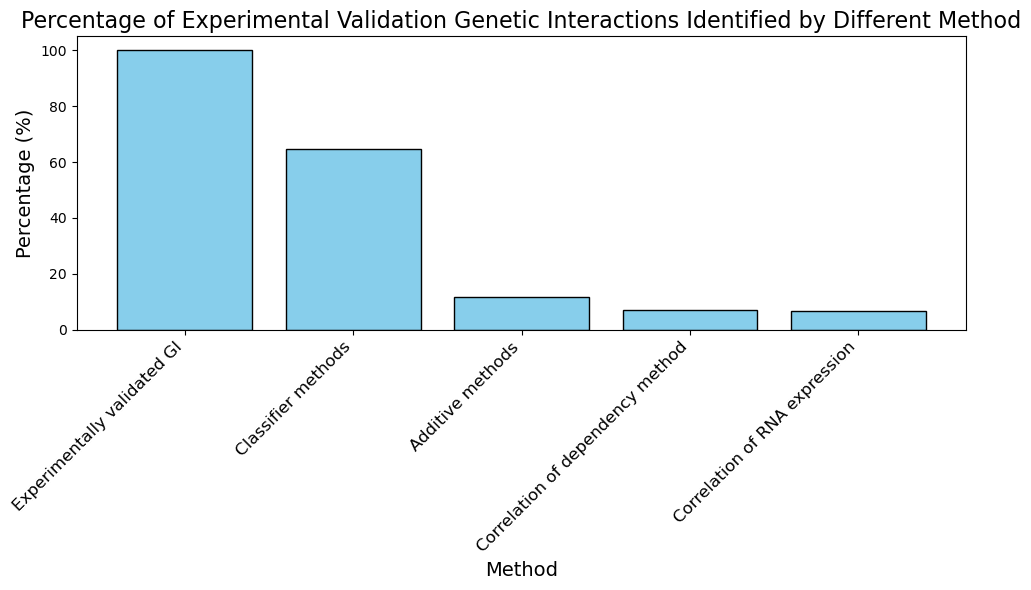

In [67]:
import matplotlib.pyplot as plt

# Plot the histogram (bar plot)
plt.figure(figsize=(10, 6))
plt.bar(df["Method"], df["Percentage Identified"], color='skyblue', edgecolor='black')

# Customize the plot
plt.xlabel("Method", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)
plt.title("Percentage of Experimental Validation Genetic Interactions Identified by Different Method", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


# Open file of GI predicted by the best classafeir

In [72]:
# Read the CSV file
file_path_gi = "/home/user/Desktop/2024_08_27/master-project2/GI_prediction_expremint_label_final.csv"
df_gi = pd.read_csv(file_path_gi) 
df_gi

,expected_combinatorial_lfc,Euclidean_distance_expexted_observed,highist_expression,lowest_expression,Euclidean_distance_expresstion,expre_Correlation,dep_Correlation,Jaccard BP Similarity,Jaccard MF Similarity,Average Wang BP Similarity,...,True_Label,Predicted_Label,Probability_Class_1,Class_label_sum,Class_label_exp,Class_label_dep,Class_label_corr,cell_line,condition,Gene_combination
0,-0.619848,0.437799,7.426641,6.367170,1.059471,0.149144,0.029649,0.384615,0.642857,0.302554,...,1,1,0.99,no GI,GI,no GI,no GI,Meljuso,2CP sel,PFKM_PFKP
1,-8.764912,5.108812,7.919391,6.596557,1.322834,0.334410,0.261920,0.285714,0.666667,0.219515,...,1,1,0.99,lol,GI,GI,no GI,A375,2CP,PSMC4_PSMC6
2,-6.737109,4.082036,7.605290,6.600122,1.005169,0.334410,0.261920,0.285714,0.666667,0.219515,...,1,1,0.99,lol,GI,GI,no GI,Meljuso,2CP sel,PSMC4_PSMC6
3,-1.320289,0.255877,4.925937,3.950378,0.975559,0.662843,0.336673,0.777778,0.666667,0.451522,...,1,1,0.98,no GI,GI,GI,GI,Meljuso,2CP sel,NFIC_NFIX
4,-1.432005,0.319133,6.663721,5.433590,1.230131,0.298219,0.191365,0.321429,0.615385,0.206067,...,0,1,0.97,no GI,no GI,no GI,no GI,A375,2CP,FXR1_FXR2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,-3.497061,1.347122,6.447566,4.836692,1.610874,0.459975,0.019399,0.333333,0.400000,0.308020,...,0,1,0.51,no GI,no GI,no GI,no GI,A375,2CP,IPO7_IPO8
321,0.052012,0.009240,8.551628,0.884382,7.667246,0.186884,0.000490,0.333333,0.250000,0.385662,...,0,1,0.51,no GI,no GI,no GI,no GI,Meljuso,2CP sel,TAGLN_TAGLN2
322,0.453856,0.933113,5.598699,3.524508,2.074192,0.485452,0.706943,0.071429,0.384615,0.093600,...,1,1,0.51,no GI,GI,GI,no GI,A375,2CP,EXT2_EXTL3
323,-0.117638,0.474846,4.986099,0.583264,4.402835,0.570729,0.140022,0.324324,0.333333,0.163484,...,0,1,0.51,no GI,no GI,no GI,no GI,A375,2CP,CASP1_CASP4


# Plot the distripution of predicted GI across class label exp

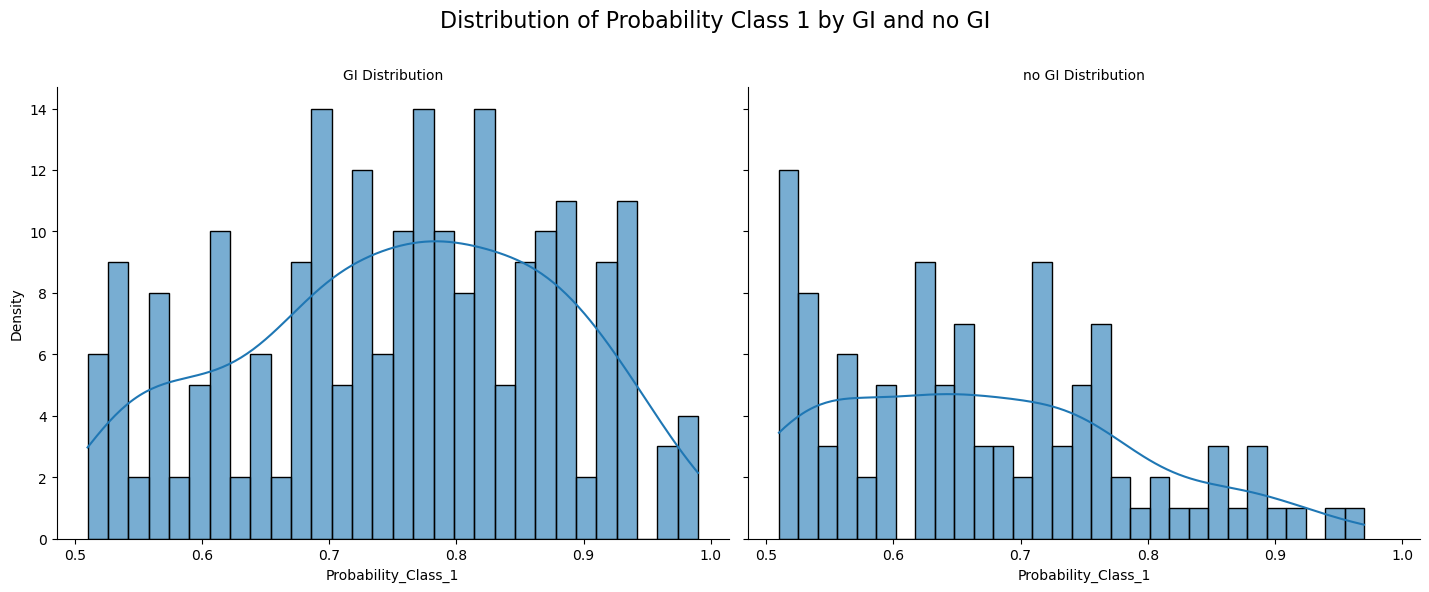

In [79]:


# FacetGrid for side-by-side plots
g = sns.FacetGrid(df_gi, col='Class_label_exp', height=6, aspect=1.2, sharex=True, sharey=True, palette='coolwarm')
g.map(sns.histplot, 'Probability_Class_1', kde=True, bins=30, alpha=0.6)

# Add titles and labels
g.set_titles(col_template="{col_name} Distribution")
g.set_axis_labels("Probability_Class_1", "Density")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Distribution of Probability Class 1 by GI and no GI', fontsize=16)

plt.show()

In [76]:
print(df.columns)

Index(['Method', 'Total_GI_Experimentally_validated', 'Comm_GIs_Exp_Validated',
       'Percentage Identified'],
      dtype='object')


# Compartion between all feature classafier and classafeir with only the best feature

In [30]:
rf_data = {
    "Classifier": ["All Features", "Best Features RFECV","pscore, ascore " ],
    "AUC": [0.896158,0.890051,0.68315 ],
    "Accuracy": [0.857823,0.846259,0.838095],
    "Precision": [0.703822,0.670769,0.753846],
    "Recall": [0.655786,0.646884 ,0.436202],
    "F1-Score": [0.678955, 0.658610, 0.552632 ],
}


# Create DataFrame from corrected data
rf_df = pd.DataFrame(rf_data)

# Display the DataFrame
print(rf_df)

            Classifier       AUC  Accuracy  Precision    Recall  F1-Score
0         All Features  0.896158  0.857823   0.703822  0.655786  0.678955
1  Best Features RFECV  0.890051  0.846259   0.670769  0.646884  0.658610
2      pscore, ascore   0.683150  0.838095   0.753846  0.436202  0.552632


# Plot the classafier with diffrent features

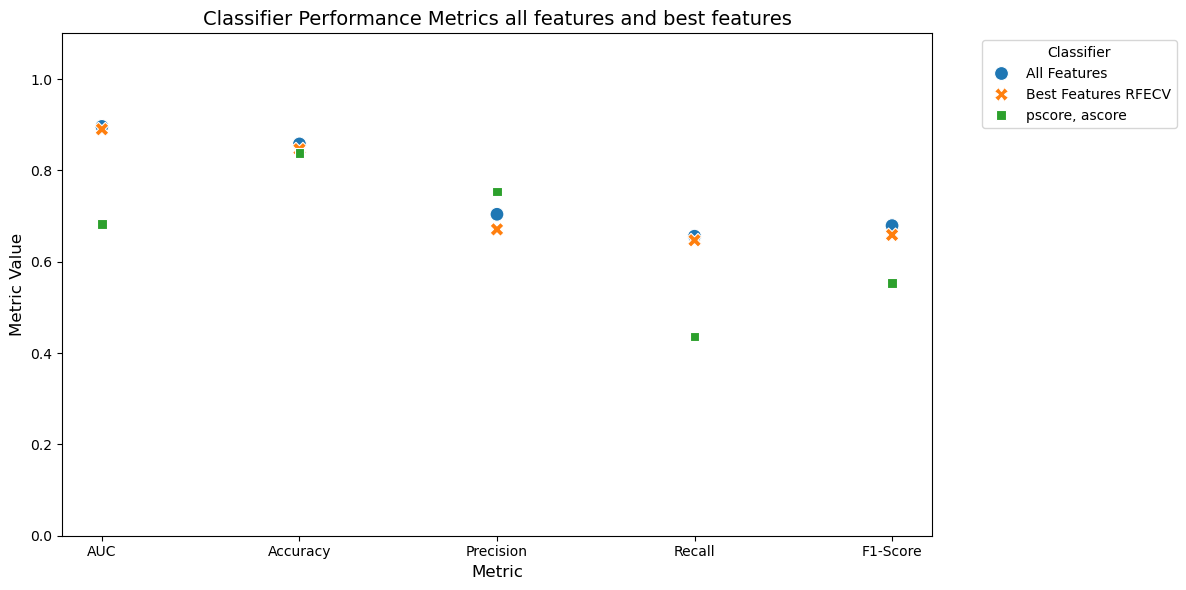

In [31]:
# Melt the DataFrame to prepare for visualization
melted_df = rf_df.melt(
    id_vars=['Classifier'],  
    value_vars=['AUC', 'Accuracy', 'Precision', 'Recall', 'F1-Score'],  # The metrics
    var_name='Metric',  
    value_name='Value'  # 
)

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=melted_df, 
    x='Metric',  # X-axis: Metric type
    y='Value',  # Y-axis: Metric value
    hue='Classifier',  # Hue by Classifier to color by model
    style='Classifier',  # Use different markers for each classifier
    s=100,  # Size of the scatter plot markers
    palette='tab10'  # Color palette for the classifiers
)

# Add title and labels
plt.title('Classifier Performance Metrics all features and best features', fontsize=14)
plt.ylabel('Metric Value', fontsize=12)
plt.xlabel('Metric', fontsize=12)
plt.ylim(0, 1.1)  # Adjust y-axis limit for better visibility
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Classifier')
plt.tight_layout()

# Show the plot
plt.show()